[**Monthly**](#Monthly)  
[**Quarterly**](#Quarterly)  
[**Yearly**](#Yearly)

In [1]:
tsl=readRDS("../data/blobs/bsample.tsl.rds")

In [2]:
ty=names(tsl[[2]])

In [3]:
.libPaths(c("~/r-packages/",.libPaths()))
library(ggplot2)
library(reshape)

# Monthly

In [5]:
ml=c("01","02","03","04","05","06","07","08","09","10","11","12")
dfm=data.frame(matrix(ncol=5, nrow=0))
colnames(dfm)=c("Set","Lan","Period","Total","Copied")
j=1
for(i in 2:3){
    for(l in ty){
        data=tsl[[i]][[l]]
        for(y in 1970:2020){
            for(q in 0:3){
                for(m in 1:3){
                    idx=(q*3)+m
                    p=paste(y,ml[idx],sep="-")
                    row=data[[p]]
                    if(is.null(row)){
                        dfm[j,]=c(i,l,p,0,0)
                    }else{
                        dfm[j,]=c(i,l,p,row["total"],row["copied"])
                    }
                    j=j+1
                }
            }
        }
    }
}
dfm[,"Set"]=as.factor(dfm[,"Set"])
dfm[,"Lan"]=as.factor(dfm[,"Lan"])
dfm[,"Period"]=as.Date(paste(dfm[,"Period"],"-01",sep=""))
dfm[,"Total"]=as.integer(dfm[,"Total"])
dfm[,"Copied"]=as.integer(dfm[,"Copied"])
dfm[,"Ratio"]=dfm[,"Copied"]/dfm[,"Total"]
dfm[is.na(dfm[,"Ratio"]),"Ratio"]=0

### Total & Copied

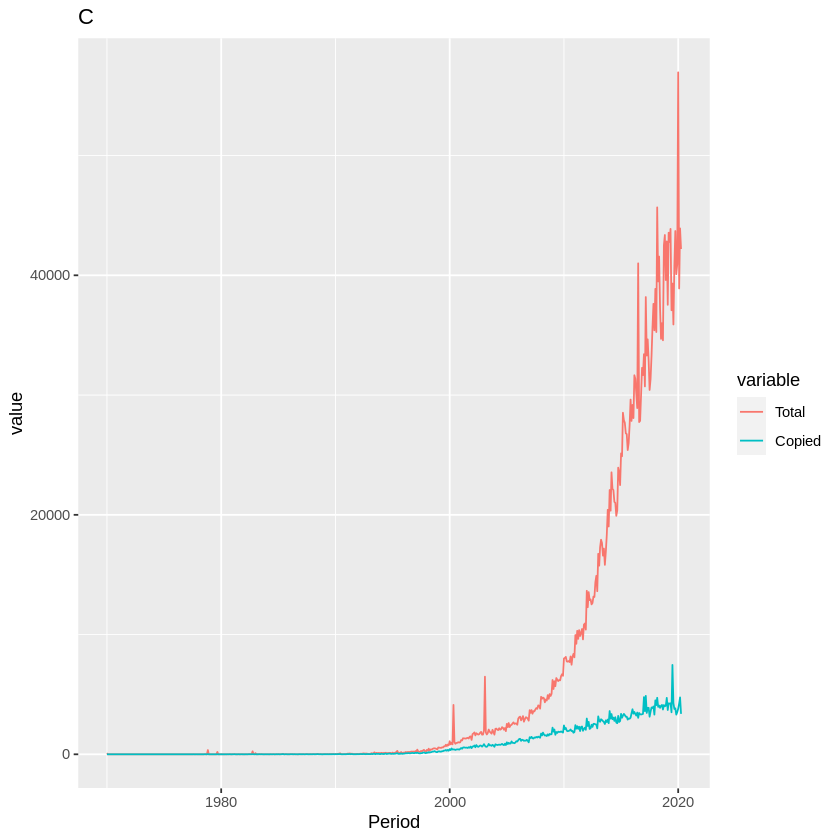

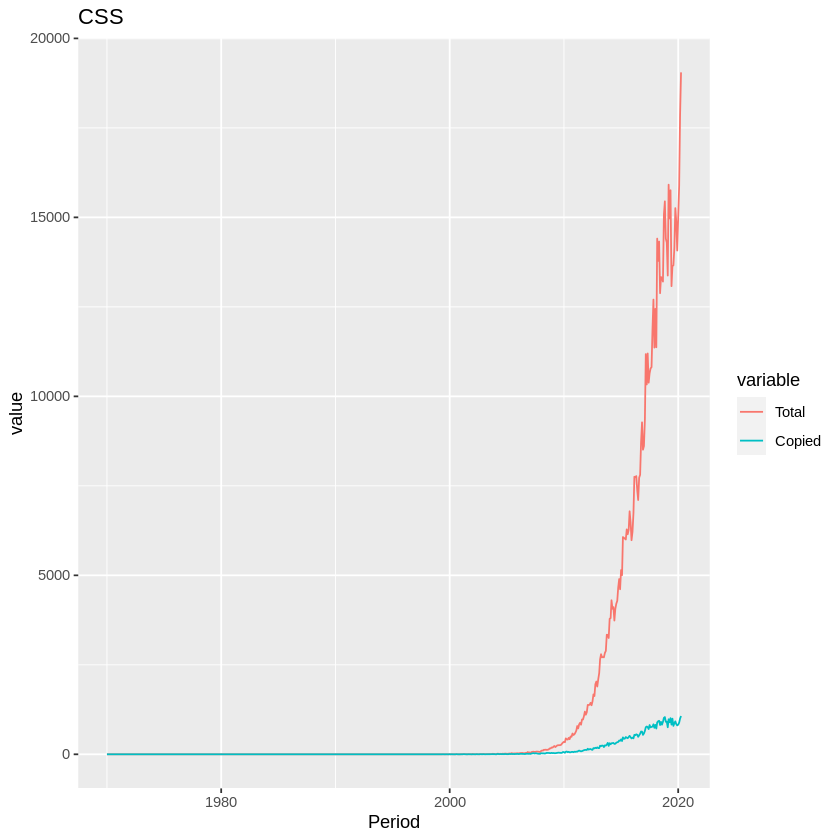

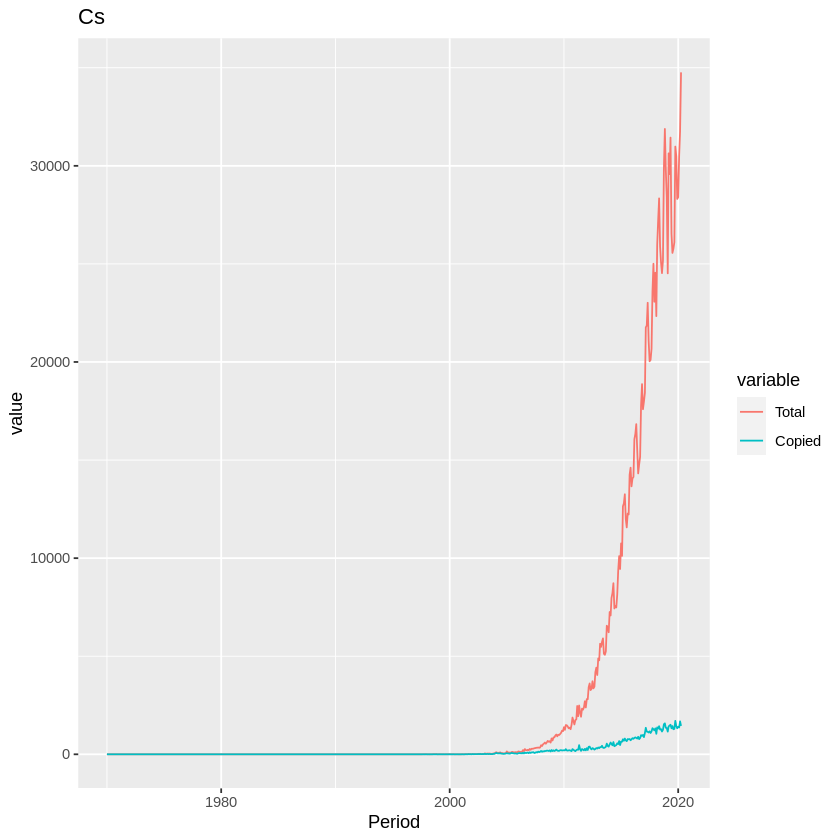

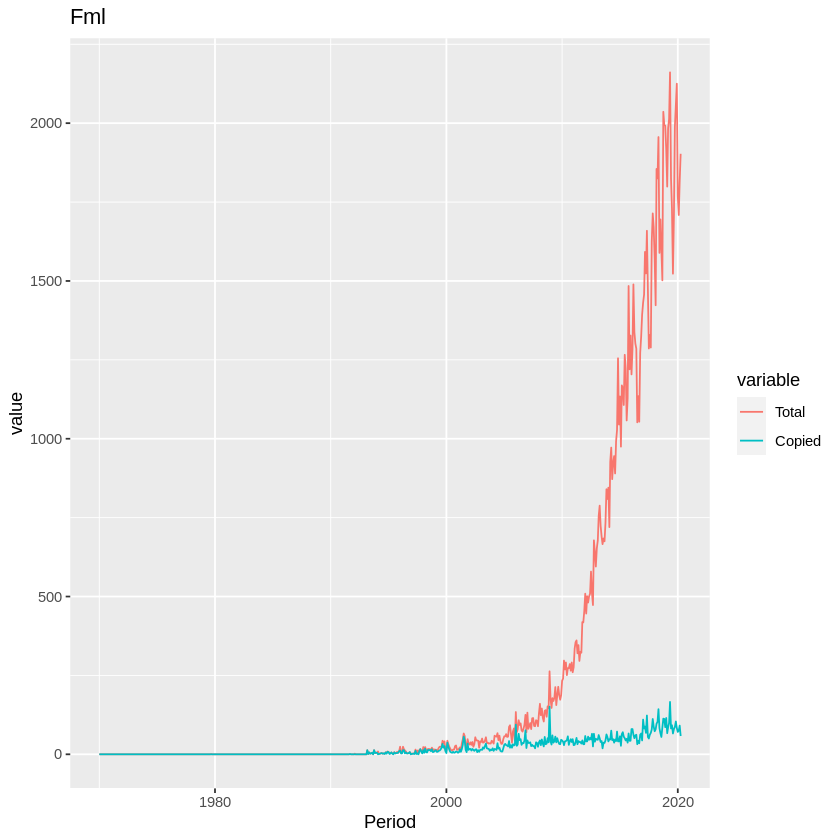

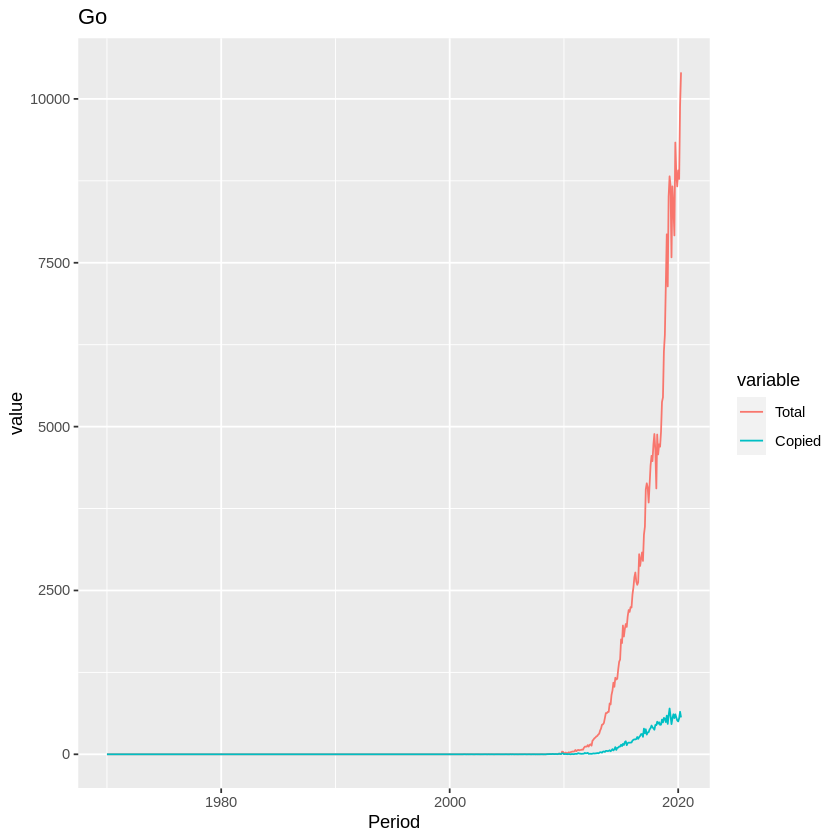

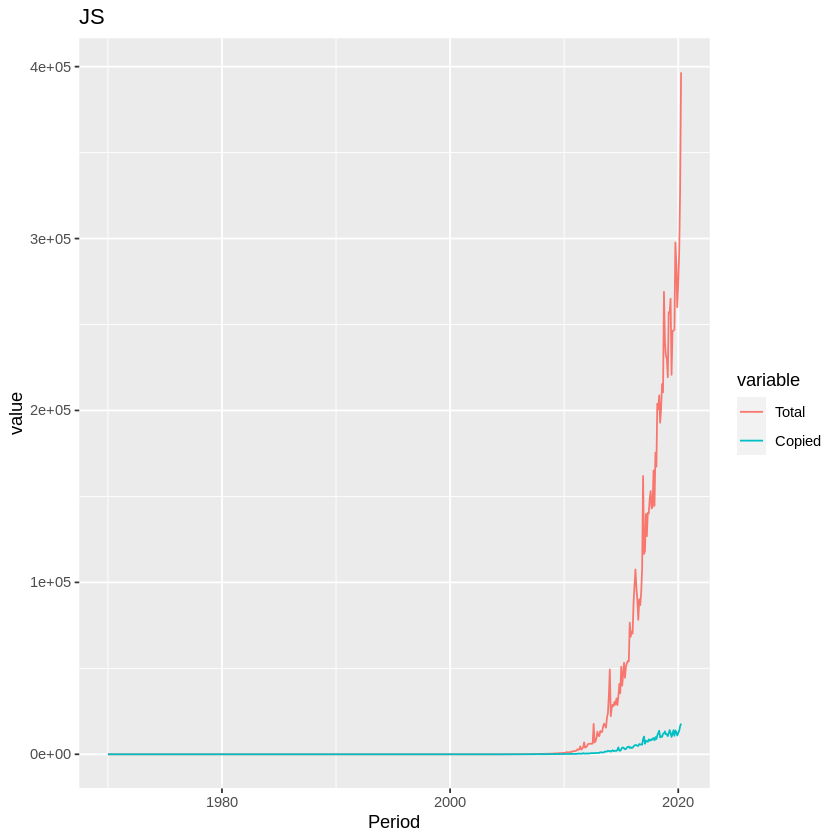

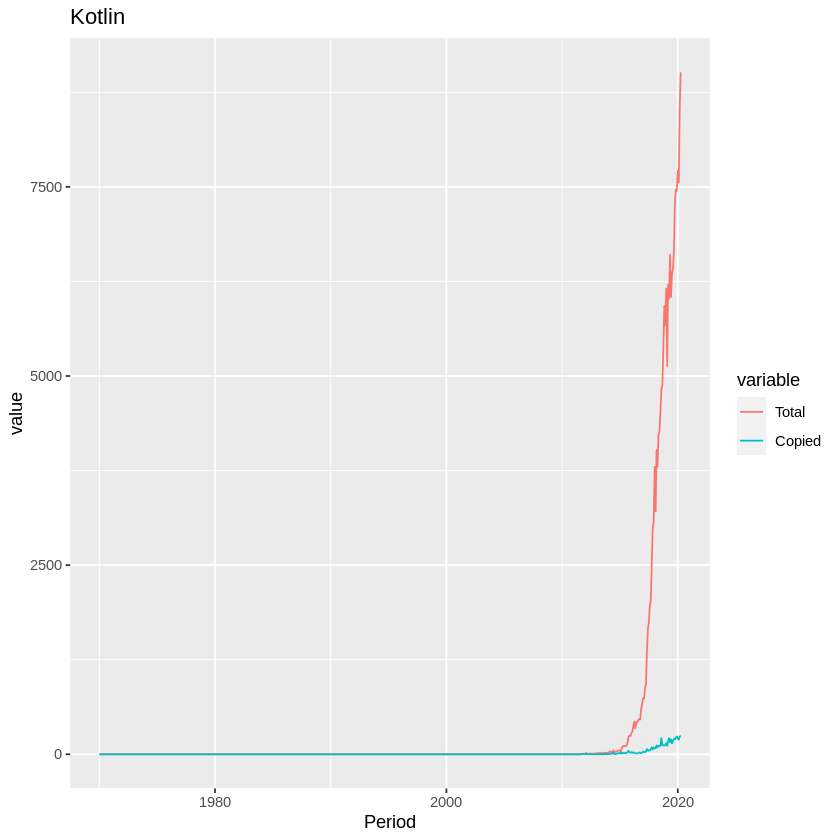

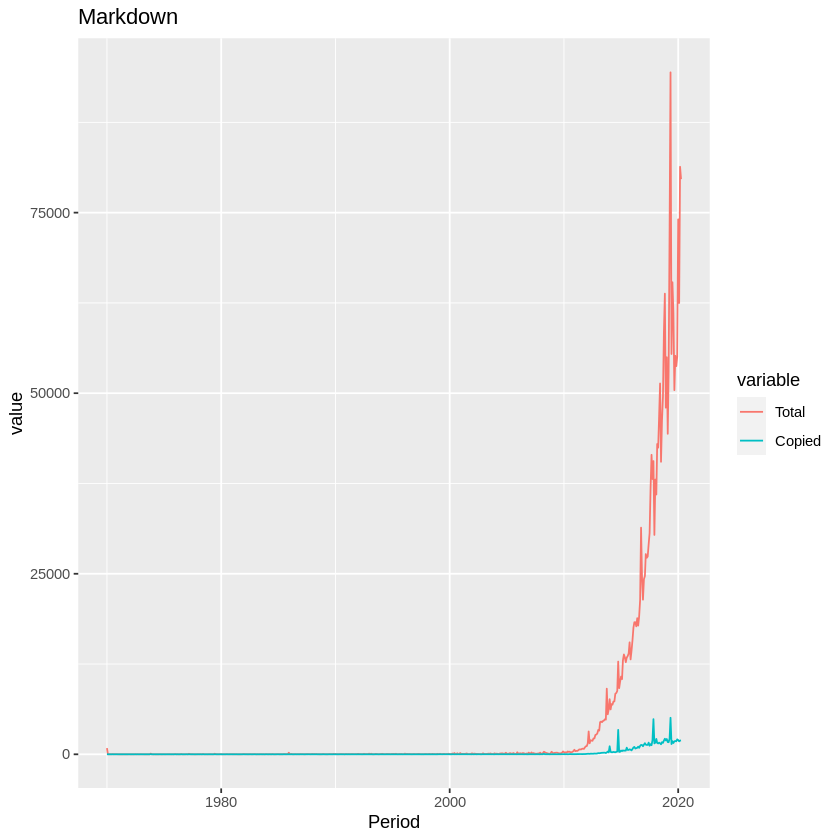

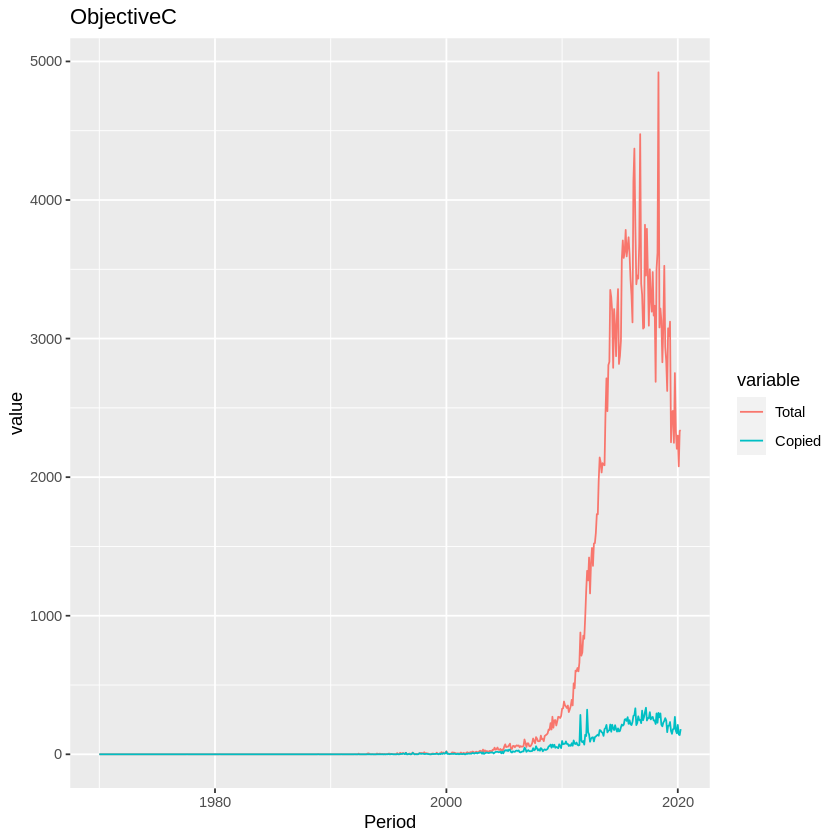

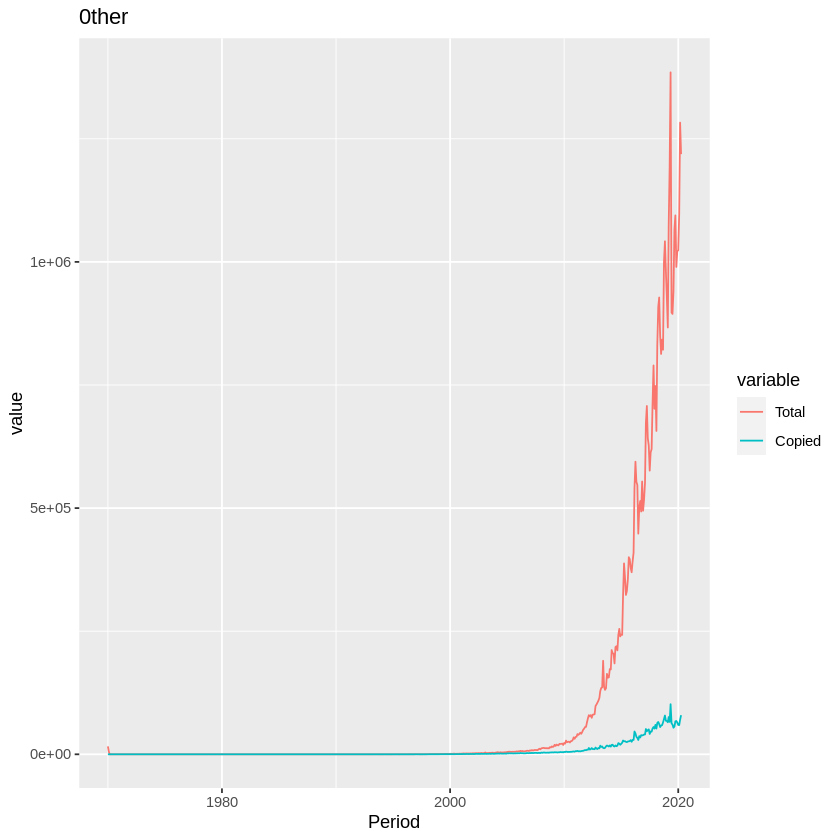

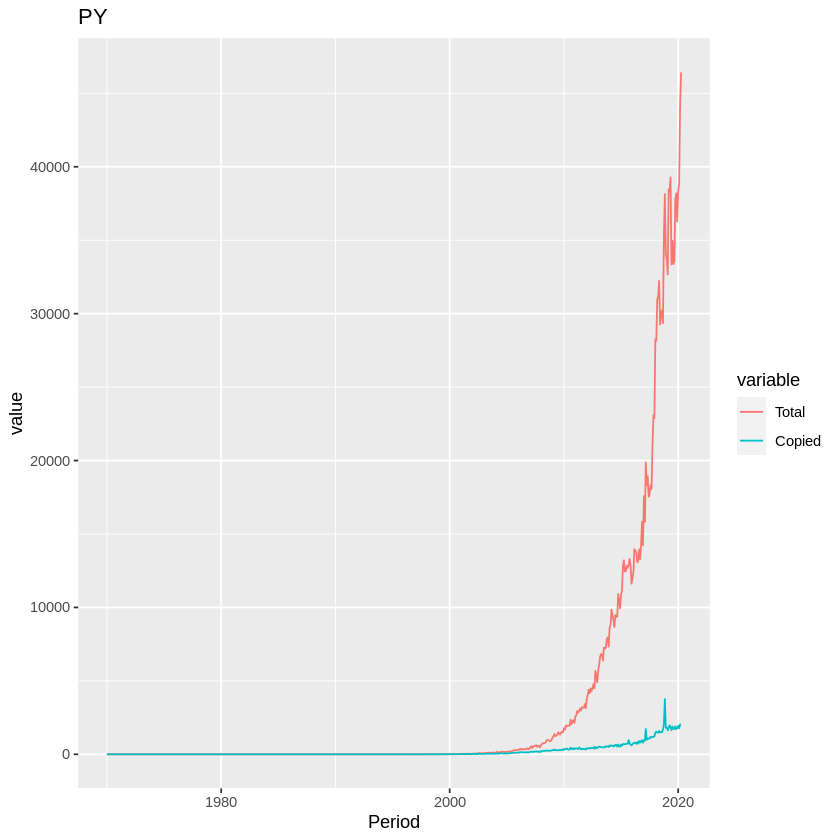

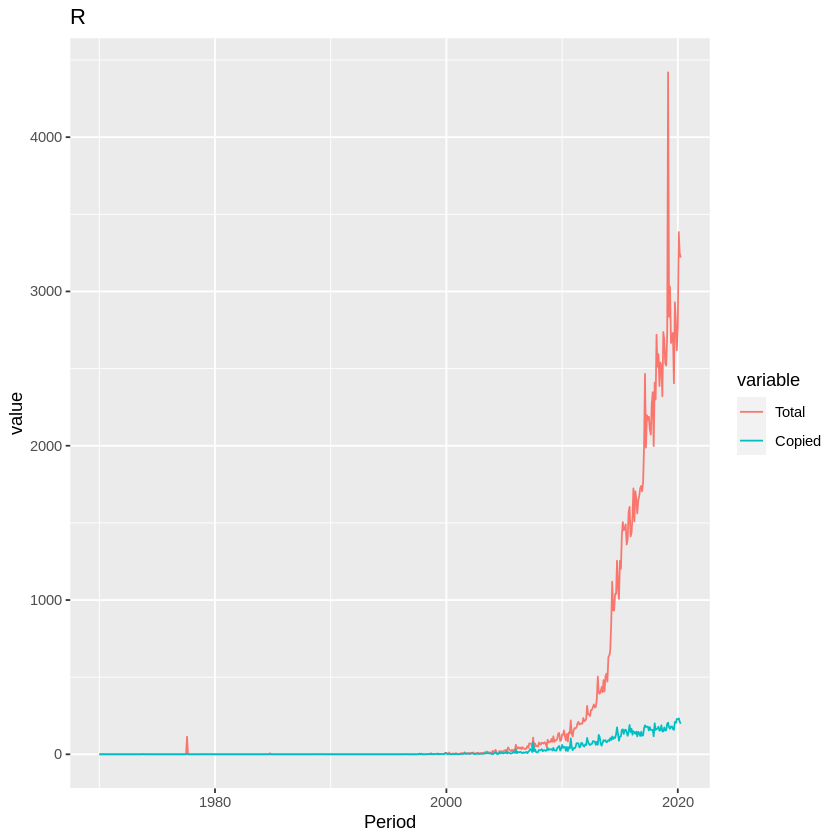

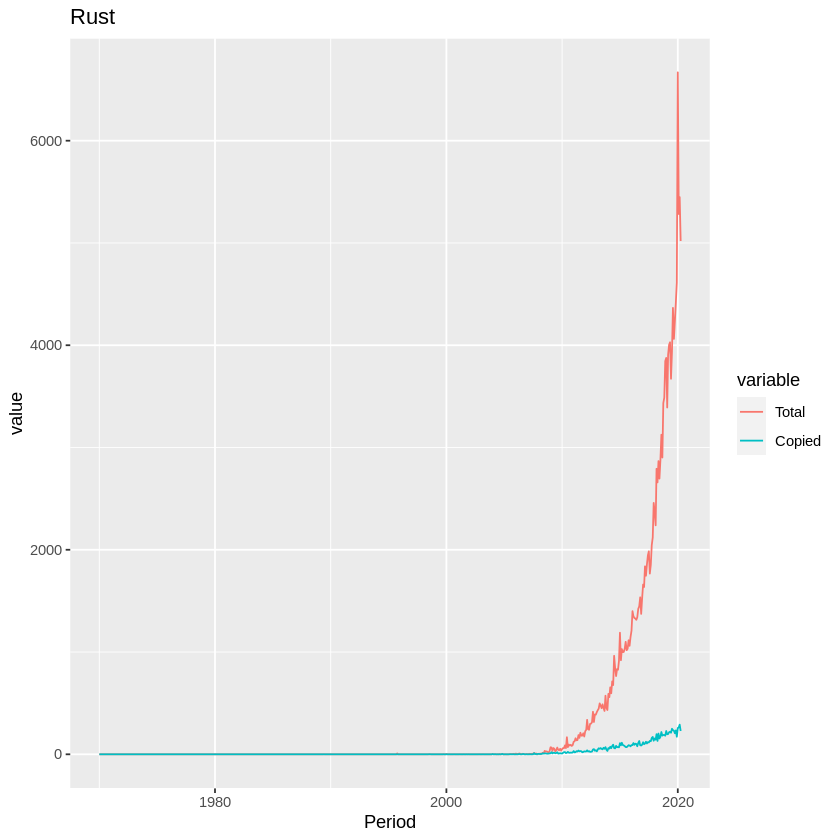

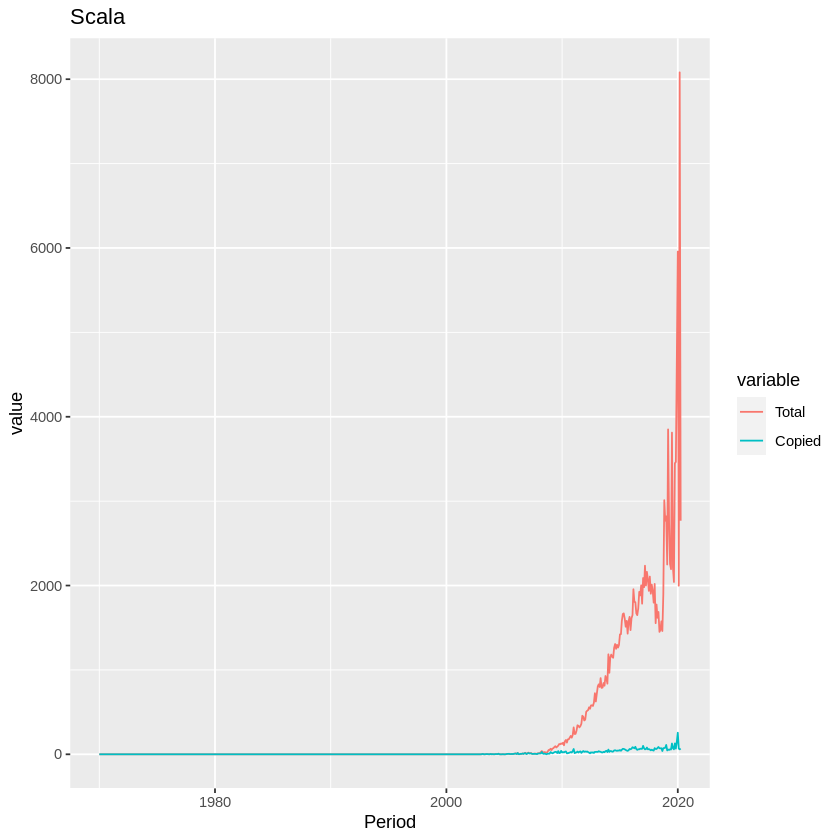

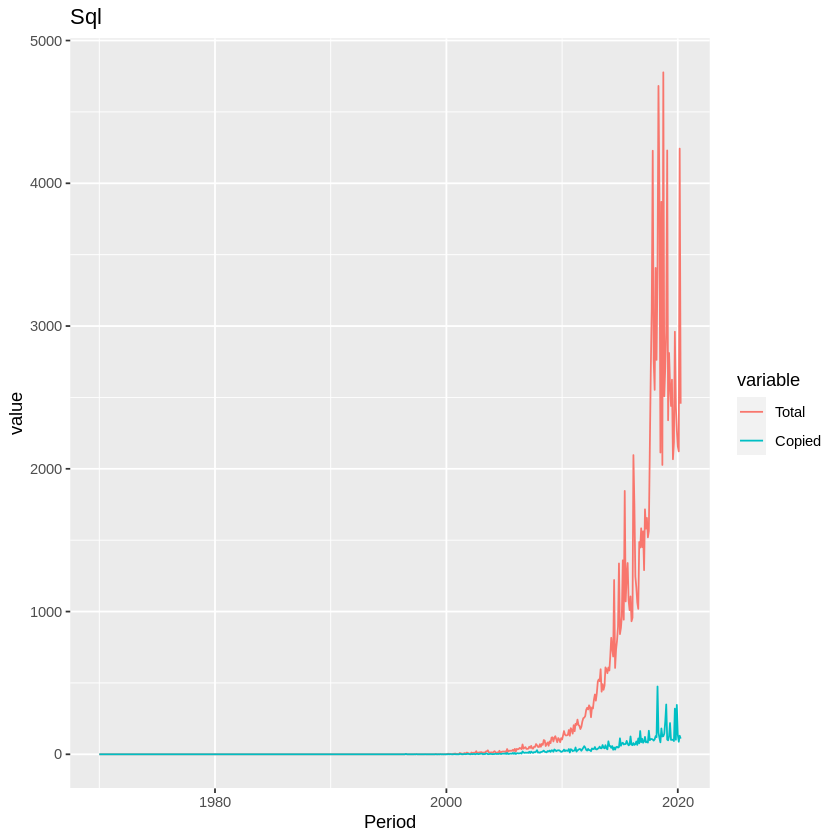

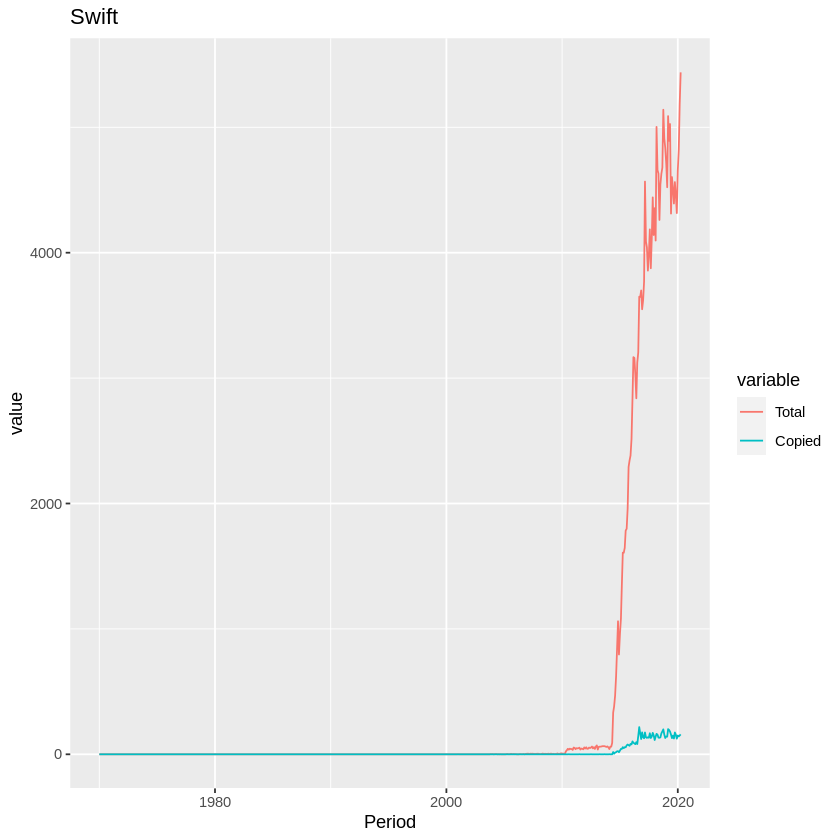

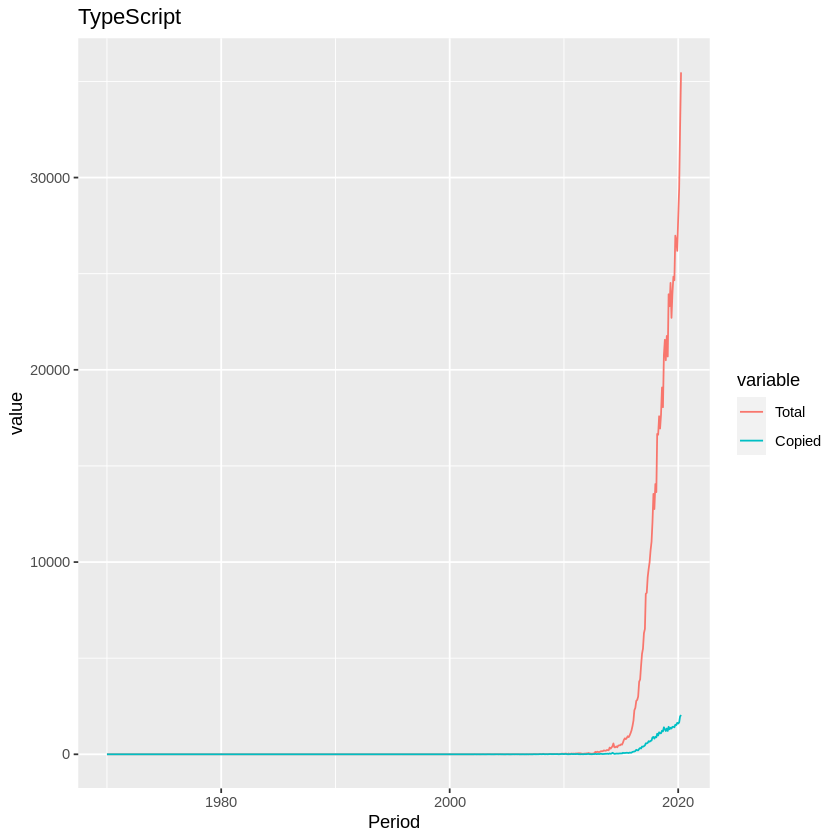

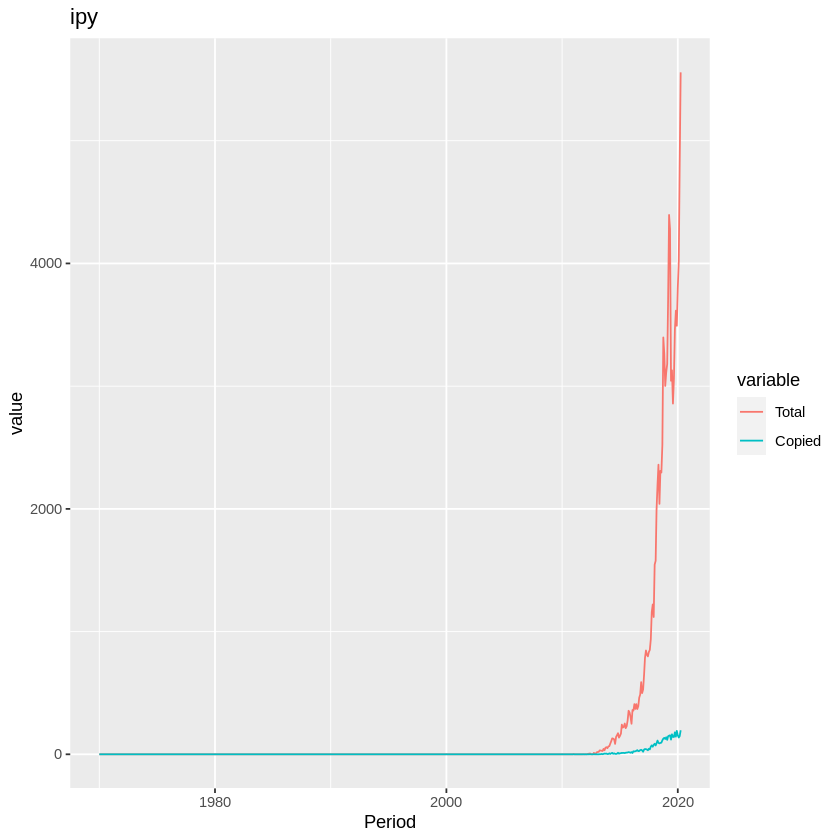

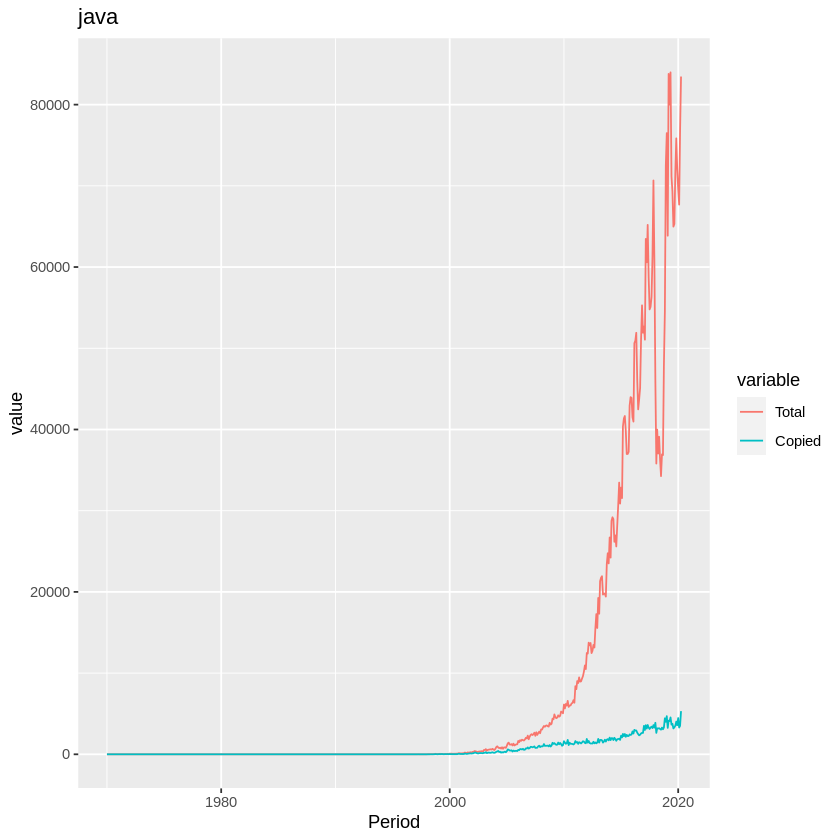

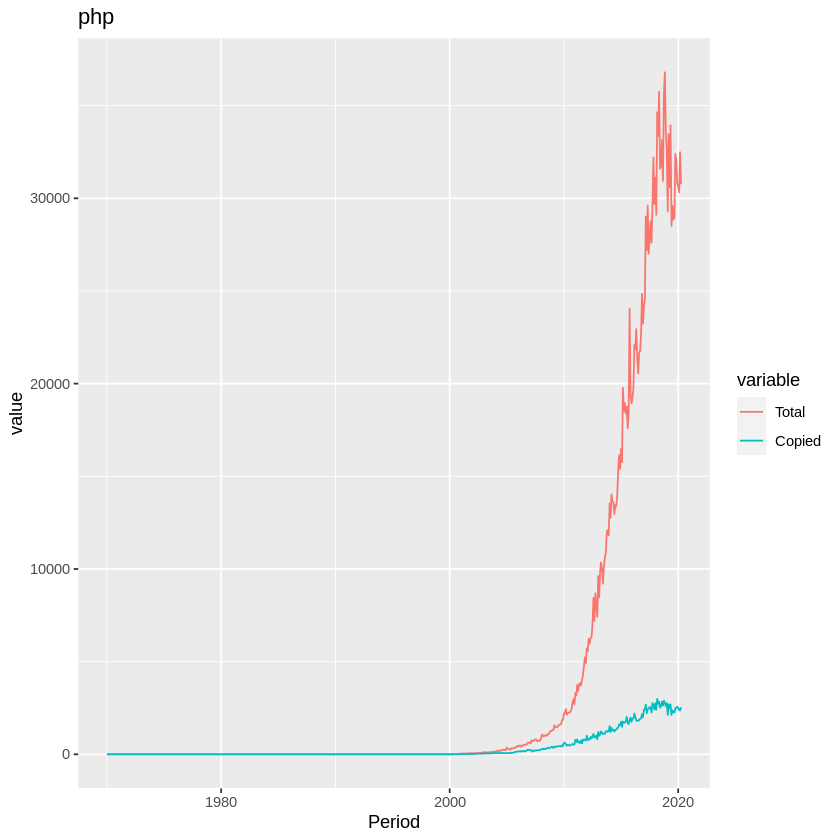

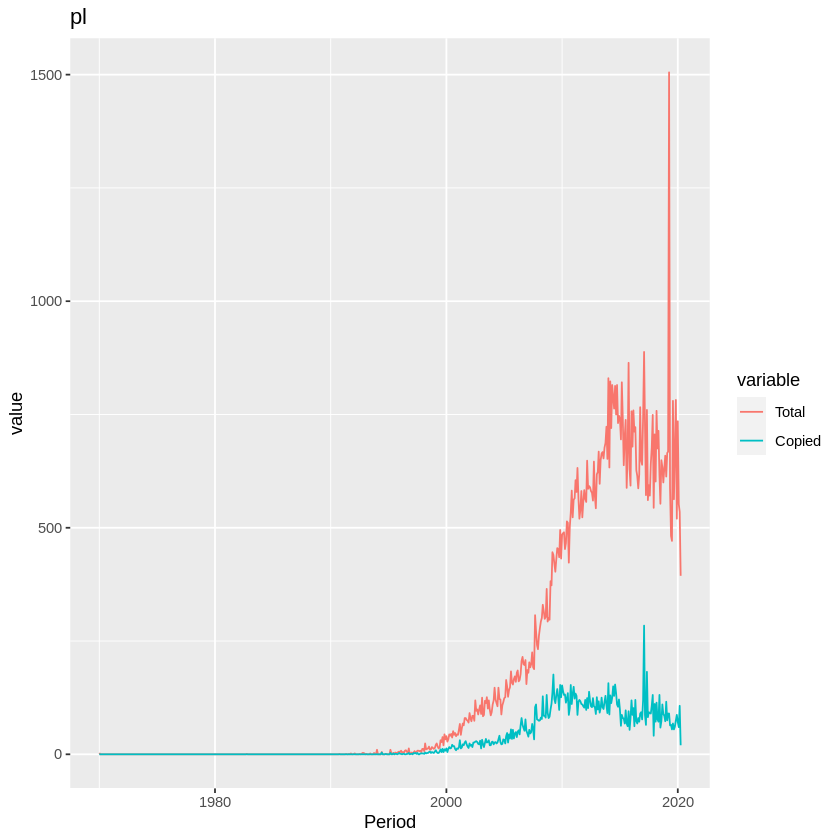

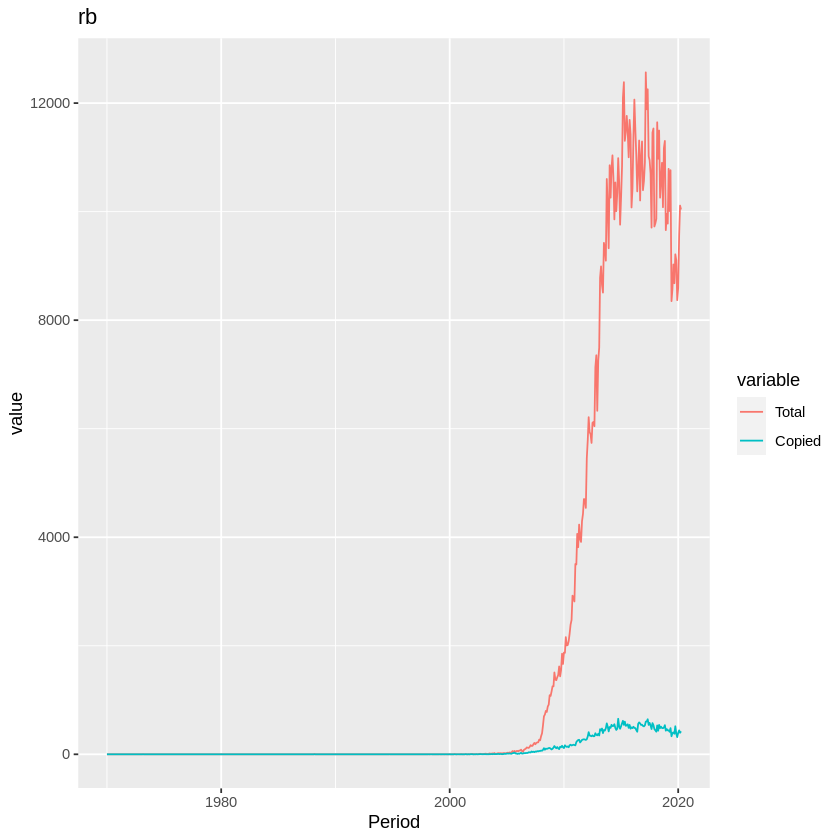

In [83]:
for(i in 3:3){
    for(l in ty){
        data=head(dfm[dfm$Set==i&dfm$Lan==l,c("Period","Total","Copied")],-8)
        molten <- melt(data, id.vars = "Period")
        print(ggplot(molten, aes(x = Period, y = value, colour = variable)) + geom_line() + ggtitle(l))
    }
}

### Copy Ratio

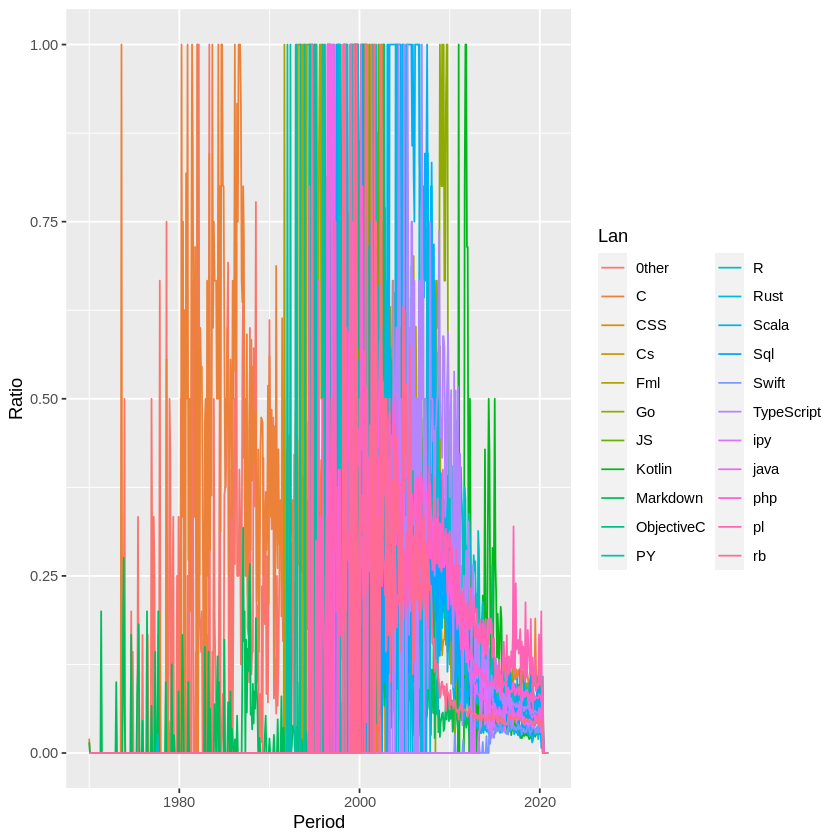

In [89]:
for(i in 3:3){
    data=dfm[dfm$Set==i,c("Period","Lan","Ratio")]
    print(ggplot(data, aes(x = Period, y = Ratio, colour = Lan)) + geom_line())
}

# Quarterly

In [8]:
ml=c("01","02","03","04","05","06","07","08","09","10","11","12")
dfq=data.frame(matrix(ncol=5, nrow=0))
colnames(dfq)=c("Set","Lan","Period","Total","Copied")
j=1
for(i in 2:3){
    for(l in ty){
        data=tsl[[i]][[l]]
        for(y in 1970:2020){
            for(q in 0:3){
                idx=(q*3)+1
                p=paste(y,ml[idx],sep="-")
                dfq[j,]=c(i,l,p,0,0)
                for(m in 1:3){
                    idx=(q*3)+m
                    p=paste(y,ml[idx],sep="-")
                    row=data[[p]]
                    if(is.null(row)){
                        next
                    }else{
                        dfq[j,"Total"]=as.integer(dfq[j,"Total"])+as.integer(row["total"])
                        dfq[j,"Copied"]=as.integer(dfq[j,"Copied"])+as.integer(row["copied"])
                    }
                }
                j=j+1
            }
        }
    }
}
dfq[,"Set"]=as.factor(dfq[,"Set"])
dfq[,"Lan"]=as.factor(dfq[,"Lan"])
dfq[,"Period"]=as.Date(paste(dfq[,"Period"],"-01",sep=""))
dfq[,"Total"]=as.integer(dfq[,"Total"])
dfq[,"Copied"]=as.integer(dfq[,"Copied"])
dfq[,"Ratio"]=dfq[,"Copied"]/dfq[,"Total"]
dfq[is.na(dfq[,"Ratio"]),"Ratio"]=0

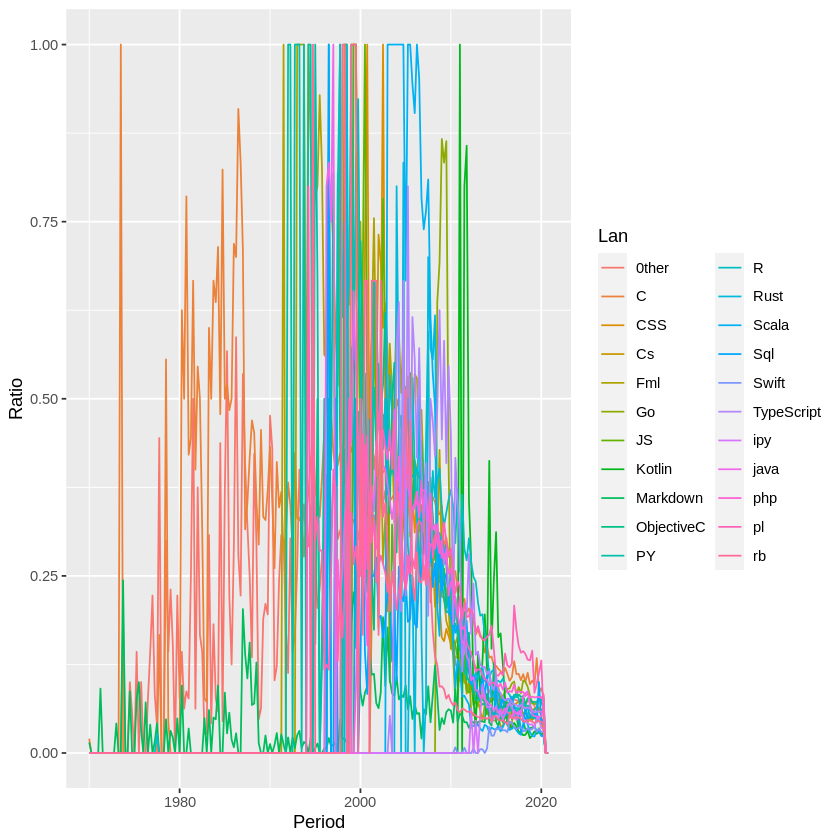

In [90]:
for(i in 3:3){
    data=dfq[dfq$Set==i,c("Period","Lan","Ratio")]
    print(ggplot(data, aes(x = Period, y = Ratio, colour = Lan)) + geom_line())
}

# Bi-annual

In [10]:
ml=c("01","02","03","04","05","06","07","08","09","10","11","12")
dfb=data.frame(matrix(ncol=5, nrow=0))
colnames(dfb)=c("Set","Lan","Period","Total","Copied")
j=1
for(i in 2:3){
    for(l in ty){
        data=tsl[[i]][[l]]
        for(y in 1970:2020){
            for(b in 0:1){
                idx=(b*6)+1
                p=paste(y,ml[idx],sep="-")
                dfb[j,]=c(i,l,p,0,0)
                for(q in 0:1){
                    for(m in 1:3){
                        idx=((b*6)+(q*3))+m
                        p=paste(y,ml[idx],sep="-")
                        row=data[[p]]
                        if(is.null(row)){
                            next
                        }else{
                            dfb[j,"Total"]=as.integer(dfb[j,"Total"])+as.integer(row["total"])
                            dfb[j,"Copied"]=as.integer(dfb[j,"Copied"])+as.integer(row["copied"])
                        }
                    }
                }
                j=j+1
            }
        }
    }
}
dfb[,"Set"]=as.factor(dfb[,"Set"])
dfb[,"Lan"]=as.factor(dfb[,"Lan"])
dfb[,"Period"]=as.Date(paste(dfb[,"Period"],"-01",sep=""))
dfb[,"Total"]=as.integer(dfb[,"Total"])
dfb[,"Copied"]=as.integer(dfb[,"Copied"])
dfb[,"Ratio"]=dfb[,"Copied"]/dfb[,"Total"]
dfb[is.na(dfb[,"Ratio"]),"Ratio"]=0

# Yearly

In [12]:
ml=c("01","02","03","04","05","06","07","08","09","10","11","12")
dfy=data.frame(matrix(ncol=5, nrow=0))
colnames(dfy)=c("Set","Lan","Period","Total","Copied")
j=1
for(i in 2:3){
    for(l in ty){
        data=tsl[[i]][[l]]
        for(y in 1970:2020){
            p=paste(y,"01",sep="-")
            dfy[j,]=c(i,l,p,0,0)
            for(q in 0:3){
                for(m in 1:3){
                    idx=(q*3)+m
                    p=paste(y,ml[idx],sep="-")
                    row=data[[p]]
                    if(is.null(row)){
                        next
                    }else{
                        dfy[j,"Total"]=as.integer(dfy[j,"Total"])+as.integer(row["total"])
                        dfy[j,"Copied"]=as.integer(dfy[j,"Copied"])+as.integer(row["copied"])
                    }
                }
            }
            j=j+1
        }
    }
}
dfy[,"Set"]=as.factor(dfy[,"Set"])
dfy[,"Lan"]=as.factor(dfy[,"Lan"])
dfy[,"Period"]=as.Date(paste(dfy[,"Period"],"-01",sep=""))
dfy[,"Total"]=as.integer(dfy[,"Total"])
dfy[,"Copied"]=as.integer(dfy[,"Copied"])
dfy[,"Ratio"]=dfy[,"Copied"]/dfy[,"Total"]
dfy[is.na(dfy[,"Ratio"]),"Ratio"]=0

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


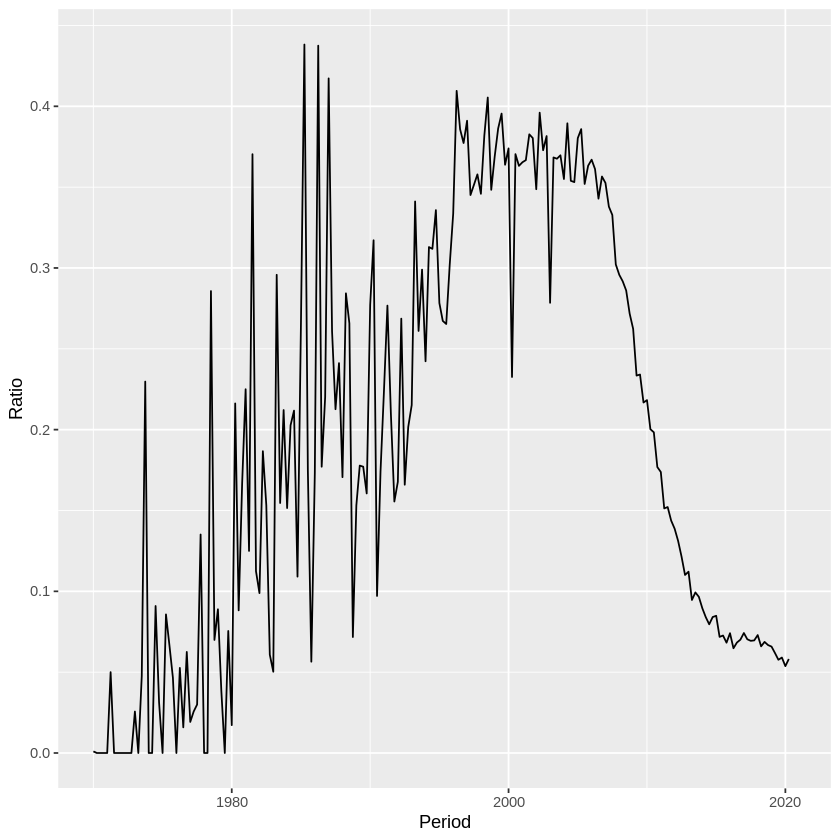

In [37]:
my=data.frame(matrix(ncol=3, nrow=0))
colnames(my)=c("Period","Total","Copied")
i=1
data=dfq
for(p in names(table(data$Period))){
    total=sum(data[data$Set==3&data$Period==p,"Total"])
    copied=sum(data[data$Set==3&data$Period==p,"Copied"])
    my[i,]=c(p,total,copied)
    i=i+1
}
my[,"Total"]=as.integer(my[,"Total"])
my[,"Copied"]=as.integer(my[,"Copied"])
my$Ratio=my$Copied/my$Total
my[,"Period"]=as.Date(my[,"Period"])
ggplot(my, aes(x = Period, y = Ratio)) + geom_line()

In [27]:
my

,Period,Total,Copied,Ratio
,<chr>,<int>,<int>,<dbl>
1,1970-01-01,22430,22,0.0009808292
2,1971-01-01,71,1,0.0140845070
3,1972-01-01,99,0,0.0000000000
4,1973-01-01,216,36,0.1666666667
5,1974-01-01,114,4,0.0350877193
6,1975-01-01,138,7,0.0507246377
7,1976-01-01,171,4,0.0233918129
8,1977-01-01,419,15,0.0357995227
9,1978-01-01,700,51,0.0728571429


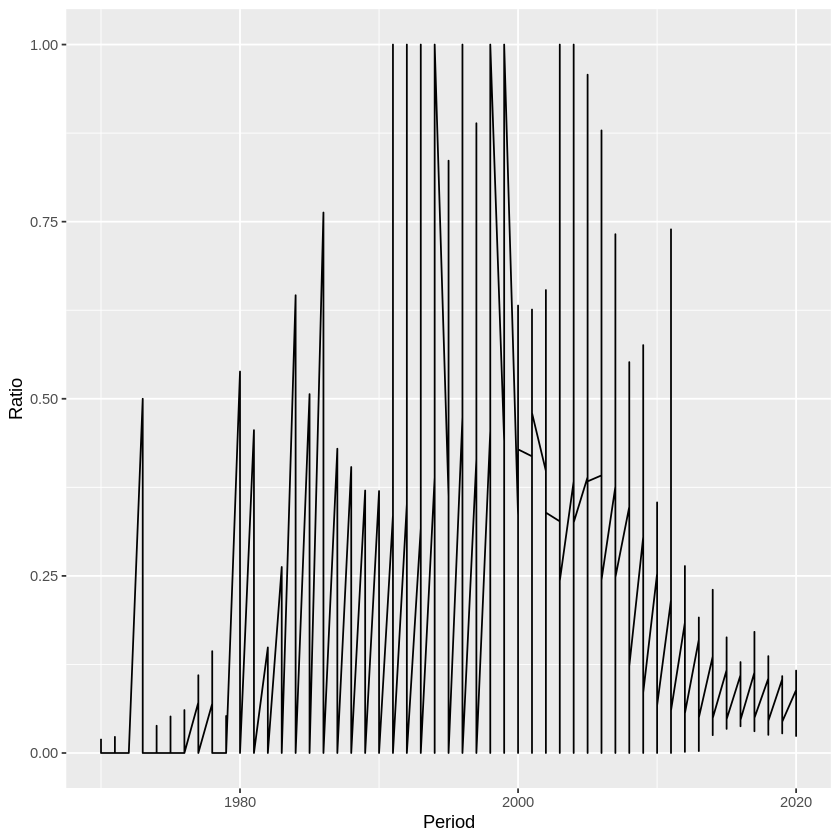

In [13]:
for(i in 3:3){
    data=dfy[dfy$Set==i,c("Period","Ratio")]
    print(ggplot(data, aes(x = Period, y = Ratio)) + geom_line())
}

**Copied**

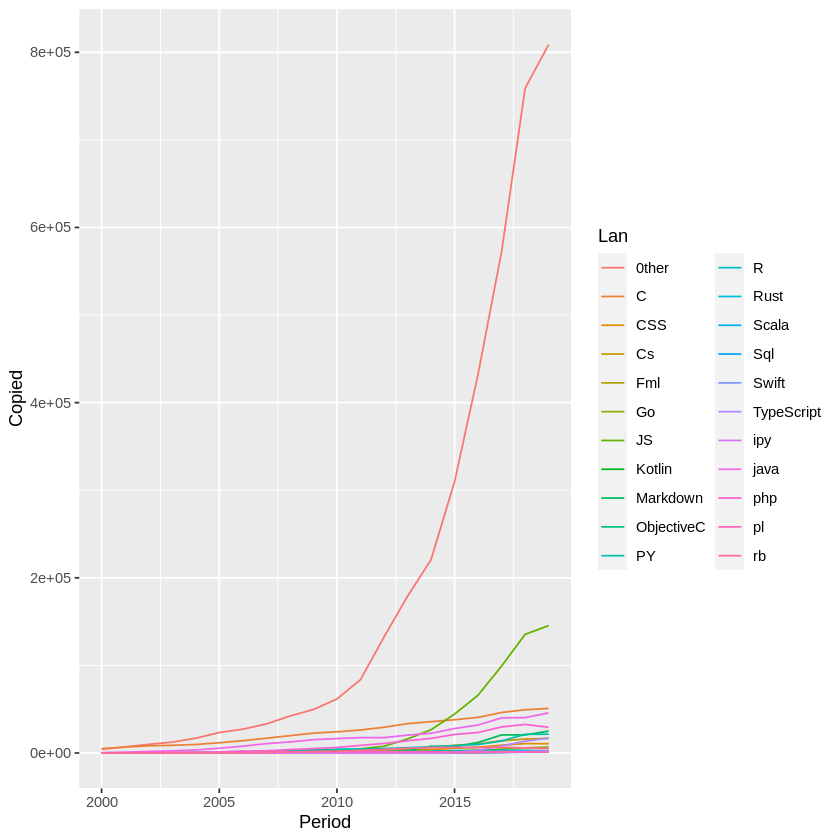

In [99]:
for(i in 3:3){
    data=dfy[dfy$Set==i&
             dfy$Period>as.Date("1999-01-01")&
             dfy$Period<as.Date("2020-01-01"),
             c("Period","Lan","Copied")]
    print(ggplot(data, aes(x = Period, y = Copied, colour = Lan)) + geom_line())
}

In [52]:
data=dfy[dfy$Set==i&
             dfy$Period>as.Date("1999-01-01")&
             dfy$Period<as.Date("2020-01-01"),
             c("Period","Lan","Copied")]
data[data$Period=='2019-01-01',]

,Period,Lan,Copied
,<date>,<fct>,<int>
1172,2019-01-01,C,50876
1223,2019-01-01,CSS,10613
1274,2019-01-01,Cs,16702
1325,2019-01-01,Fml,1126
1376,2019-01-01,Go,6795
1427,2019-01-01,JS,145494
1478,2019-01-01,Kotlin,2194
1529,2019-01-01,Markdown,25050
1580,2019-01-01,ObjectiveC,2321


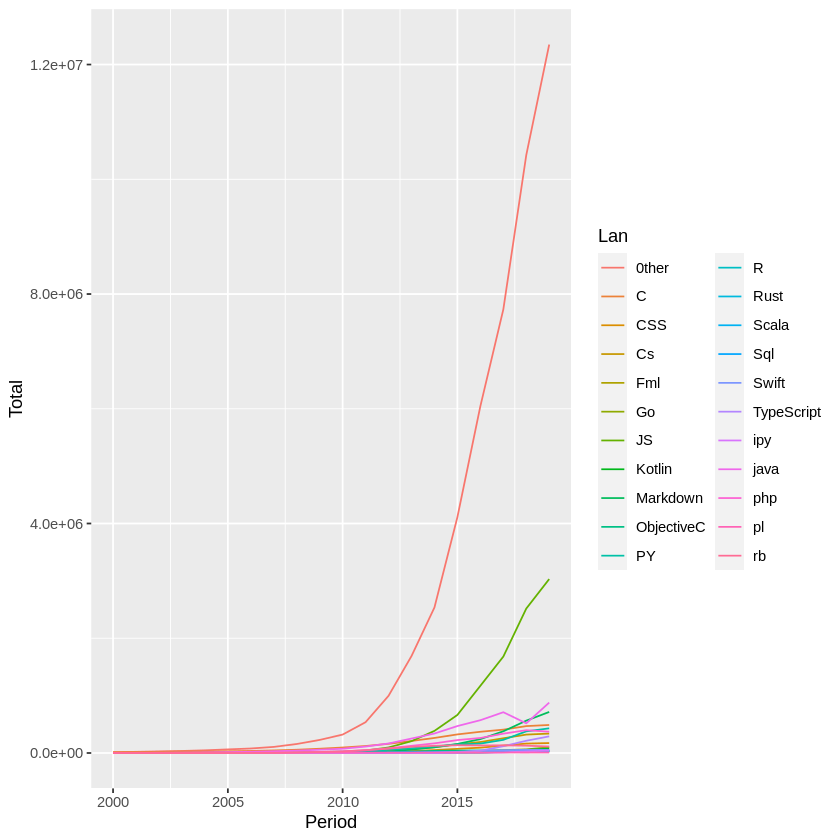

In [49]:
for(i in 3:3){
    data=dfy[dfy$Set==i&
             dfy$Period>as.Date("1999-01-01")&
             dfy$Period<as.Date("2020-01-01"),
             c("Period","Lan","Total")]
    print(ggplot(data, aes(x = Period, y = Total, colour = Lan)) + geom_line())
}

**Ratio**

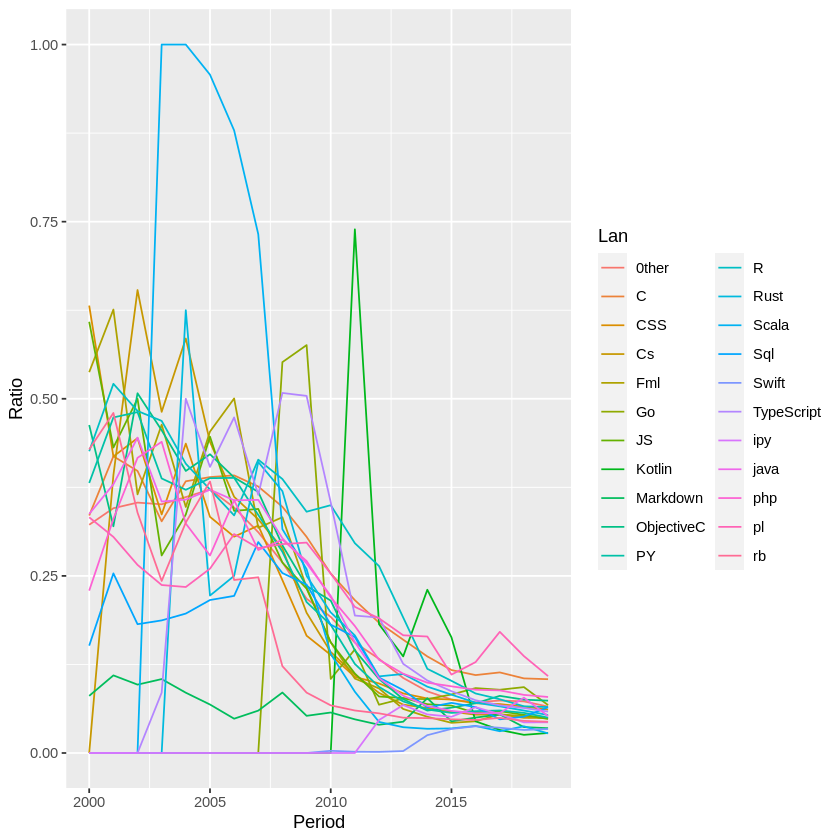

In [110]:
for(i in 3:3){
    data=dfy[dfy$Set==i&
             dfy$Period>as.Date("1999-01-01")&
             dfy$Period<as.Date("2020-01-01"),]
    print(ggplot(data, aes(x = Period, y = Ratio, colour = Lan)) + geom_line())
}

**JS**

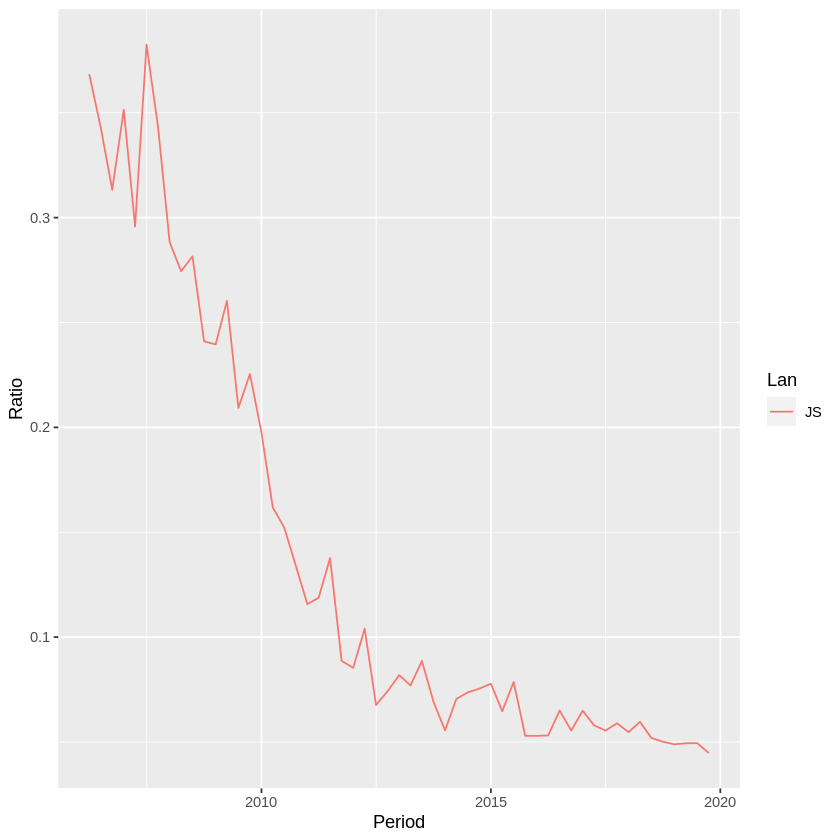

In [18]:
for(i in 3:3){
    data=dfq[dfq$Set==i&dfq$Lan=="JS"&
             dfq$Period>as.Date("2006-01-01")&
             dfq$Period<as.Date("2020-01-01"),]
    print(ggplot(data, aes(x = Period, y = Ratio, colour = Lan)) + geom_line())
}

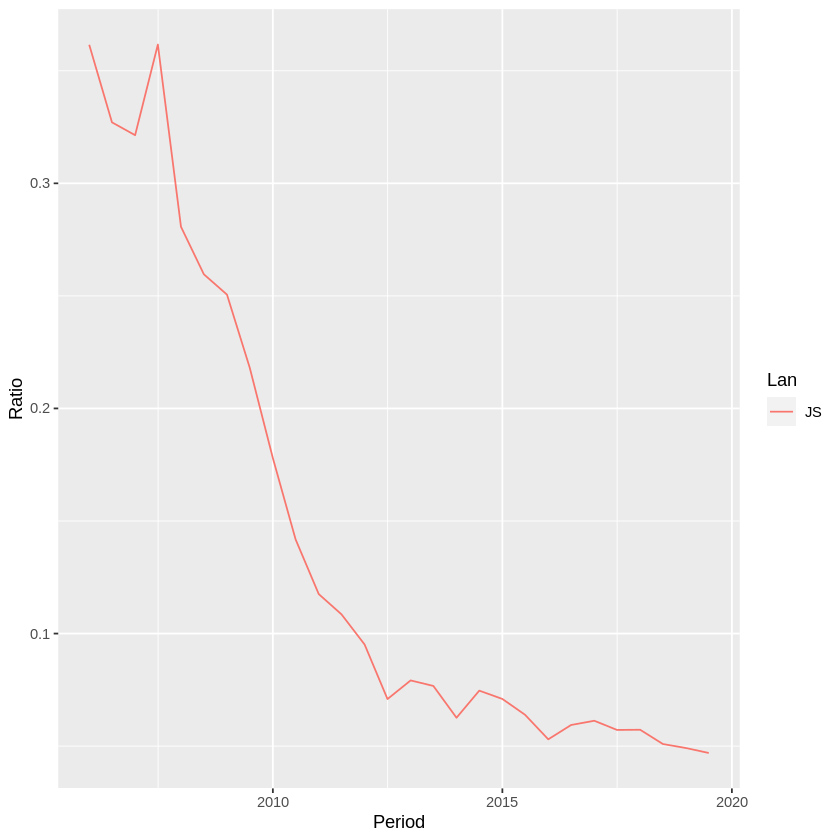

In [48]:
for(i in 3:3){
    data=dfb[dfb$Set==i&dfb$Lan=="JS"&
             dfb$Period>as.Date("2005-07-01")&
             dfb$Period<as.Date("2020-01-01"),]
    print(ggplot(data, aes(x = Period, y = Ratio, colour = Lan)) + geom_line())
}

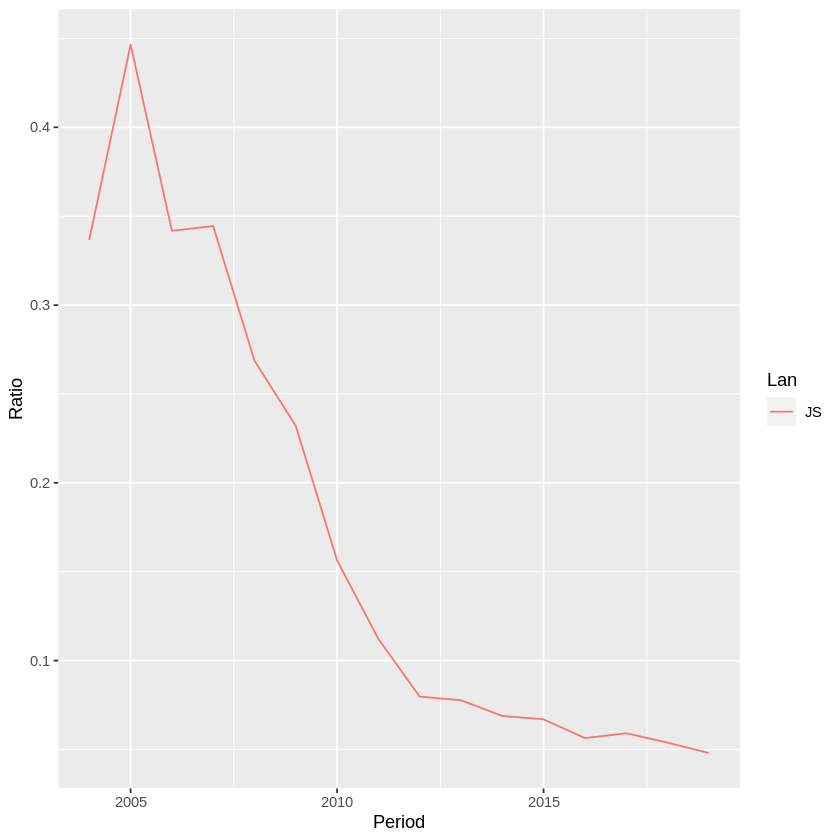

In [44]:
for(i in 3:3){
    data=dfy[dfy$Set==i&dfy$Lan=="JS"&
             dfy$Period>as.Date("2003-01-01")&
             dfy$Period<as.Date("2020-01-01"),]
    print(ggplot(data, aes(x = Period, y = Ratio, colour = Lan)) + geom_line())
}

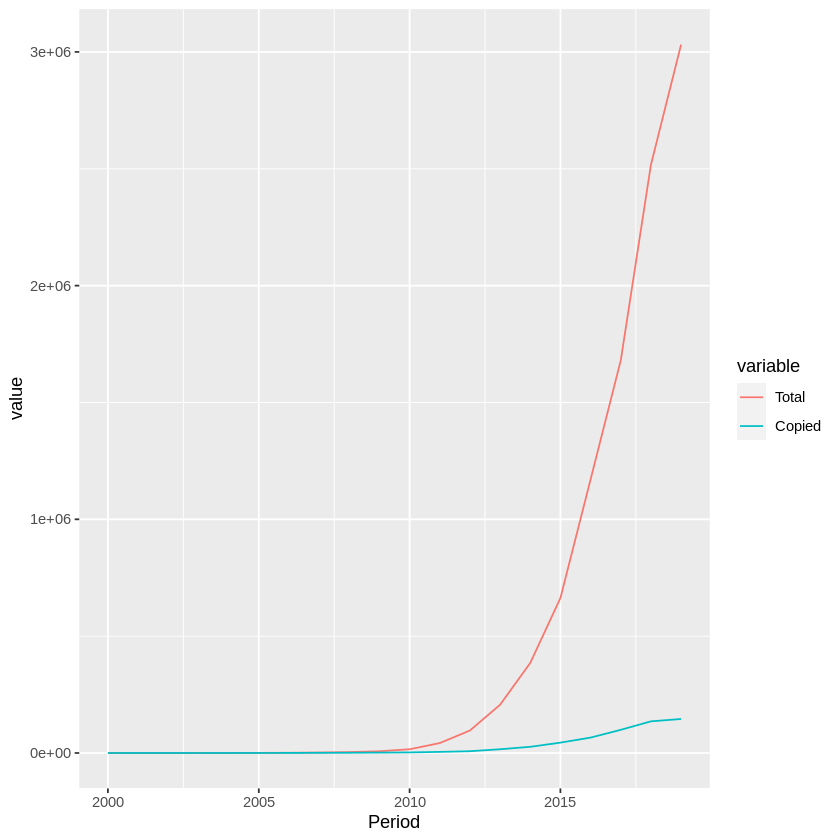

In [120]:
for(i in 3:3){
    data=dfy[dfy$Set==i&dfy$Lan=="JS"&
             dfy$Period>as.Date("1999-01-01")&
             dfy$Period<as.Date("2020-01-01"),]
    data=melt(data[,c("Period","Total","Copied")], id.vars = "Period")
    print(ggplot(data, aes(x = Period, y = value, colour = variable)) + geom_line())
}